In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loads 2019-2020 data from excel
df = pd.read_excel("./resources/weight_log_2019_2020.xlsx")
df.head()

,Date,Weight (lbs)
0,2019-01-21,144.2
1,2019-01-22,143.2
2,2019-01-23,143.8
3,2019-01-24,144.0
4,2019-01-25,145.4


In [3]:
# adds yearly data 2017-2023
yearly_data = {
    'Date': ["07/17/17", "07/17/18", "02/24/23"],
    'Weight (lbs)': [125, 145, 200]
}
df2 = pd.DataFrame(yearly_data)
df2['Date'] = pd.to_datetime(df2['Date'])

df = pd.concat([df, df2], ignore_index = True)

In [4]:
# adds 2021-2022 data from withings smart scale
df3 = pd.read_csv('./resources/withings_weight_data.csv')
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.drop(columns=['Fat mass (lb)','Bone mass (lb)', 'Muscle mass (lb)', 'Hydration (lb)', 'Comments'])
df3 = df3.rename(columns={"Weight (lb)": "Weight (lbs)"})

df = pd.concat([df, df3], ignore_index = True)

In [7]:
df = df.sort_values(by=['Date'])

df.tail()

,Date,Weight (lbs)
526,2022-05-10 08:50:53,186.8
525,2022-06-06 10:56:53,187.3
524,2022-08-03 07:05:57,184.8
523,2022-09-13 12:02:11,187.9
522,2023-02-24 00:00:00,200.0


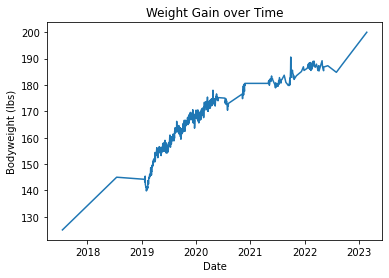

In [8]:
# plots data on line graph
x = df['Date']
y = df['Weight (lbs)']

plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Bodyweight (lbs)")
plt.title("Weight Gain over Time")
plt.show()

In [11]:
df.to_csv("./resources/bodyweights_justin.csv", index = False)

In [15]:
df2 = pd.read_csv("./resources/bodyweights_justin.csv")
df2 = df2.rename(columns={"Date": "date", "Weight (lbs)": "weight"})

df2.head()

,date,weight
0,2017-07-17 00:00:00,125.0
1,2018-07-17 00:00:00,145.0
2,2019-01-21 00:00:00,144.2
3,2019-01-22 00:00:00,143.2
4,2019-01-23 00:00:00,143.8


In [43]:
user_id = 9

df2['str'] = df2.apply(lambda row: f"({str(row.weight)}, \'{row.date.split(' ')[0]}\', {user_id})", axis = 1)

df2.head()

,date,weight,str
0,2017-07-17 00:00:00,125.0,"(125.0, '2017-07-17', 9)"
1,2018-07-17 00:00:00,145.0,"(145.0, '2018-07-17', 9)"
2,2019-01-21 00:00:00,144.2,"(144.2, '2019-01-21', 9)"
3,2019-01-22 00:00:00,143.2,"(143.2, '2019-01-22', 9)"
4,2019-01-23 00:00:00,143.8,"(143.8, '2019-01-23', 9)"


In [44]:
newRows = df2['str'].tolist()

In [50]:
query = """
        INSERT INTO bodyweights(weight, date, user_id)
        VALUES
"""

In [51]:
print(query)


        INSERT INTO bodyweights(weight, date, user_id)
        VALUES



In [52]:
for row in newRows[0:3]:
    query += row + ',\n'

In [53]:
query = query[:-2] + ';'
print(query)


        INSERT INTO bodyweights(weight, date, user_id)
        VALUES
(125.0, '2017-07-17', 9),
(145.0, '2018-07-17', 9),
(144.2, '2019-01-21', 9);


In [55]:
df.shape[0]

650